<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/fluidflow/twophasepipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculation of pressure drop in multi phase pipelines

This notebook is part of [introduction to natural gas processing using NeqSim](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb).

Litterature:
http://www.drbratland.com/

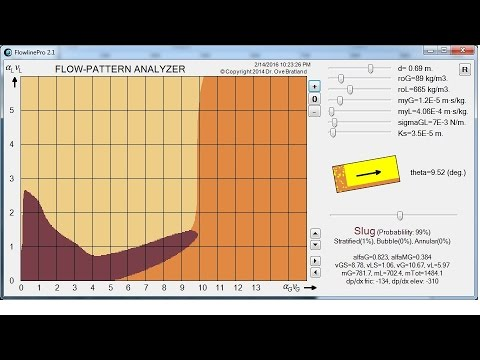

In [9]:
#@title Introduction to Calculation of pressure drop in multi phase pipelines
#@markdown Calculation of pressure drop in multi phase pipelines
from IPython.display import YouTubeVideo
YouTubeVideo('7Tsomarcq30', width=600, height=400)

In [1]:
%%capture
!pip install git+https://github.com/equinor/neqsim-python.git
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('classic')
%matplotlib inline

# Demo of a simple NeqSim multi phase pipeline simulation

In [2]:
from neqsim import methods, jNeqSim
from neqsim.thermo import fluid, TPflash, createfluid2,printFrame
from neqsim.process import pipe, pipeline, clearProcess, stream, runProcess

#Creating inlet fluid using SRK-EoS
names = ['methane', 'n-heptane', 'water']
molefractions = [0.8, 0.1, 0.01]
fluid1 = createfluid2(names, molefractions)
fluid1.setMultiPhaseCheck(True)
fluid1.setMixingRule('classic')

#Creating stream and pipeline
clearProcess()
stream1 = stream(fluid1)
stream1.setFlowRate(20.0, "MSm3/day")
stream1.setTemperature(50.15, "C")
stream1.setPressure(100.0, "bara")

pipe = jNeqSim.processSimulation.processEquipment.pipeline.PipeBeggsAndBrills(stream1);
pipe.setDiameter(0.710);
pipe.setPipeWallRoughness(5e-6);
pipe.setLength(100000);
pipe.setElevation(0.0);
pipe.setAngle(0);
pipe.setNumberOfIncrements(5);

runProcess()
pipe.run()

print('flow regine ', pipe.getFlowRegime())
print('pressure drop ', pipe.getPressureDrop(), ' bara')
print('outlet superficial velocity ' , pipe.getOutletSuperficialVelocity(), ' m/sec')

flow regine  INTERMITTENT
pressure drop  40.41209715329897  bara
outlet superficial velocity  9.03144101963413  m/sec


In [3]:
printFrame(stream1.getFluid())
printFrame(pipe.getOutStream().getFluid())

| 0                  | 1          | 2                  | 3                  | 4                  | 5   | 6               |
|:-------------------|:-----------|:-------------------|:-------------------|:-------------------|:----|:----------------|
|                    | total      | GAS                | OIL                | AQUEOUS            |     |                 |
| methane            | 8.79121E-1 | 9.86375E-1         | 3.66368E-1         | 2.01975E-6         |     | [mole fraction] |
| n-heptane          | 1.0989E-1  | 1.21266E-2         | 6.32445E-1         | 8.74637E-23        |     | [mole fraction] |
| water              | 1.0989E-2  | 1.49851E-3         | 1.18645E-3         | 9.99998E-1         |     | [mole fraction] |
|                    |            |                    |                    |                    |     |                 |
| Density            |            | 7.12612E1          | 5.90128E2          | 9.79882E2          |     | [kg/m^3]        |
| PhaseFraction 

Text(0, 0.5, 'pressure [bara]')

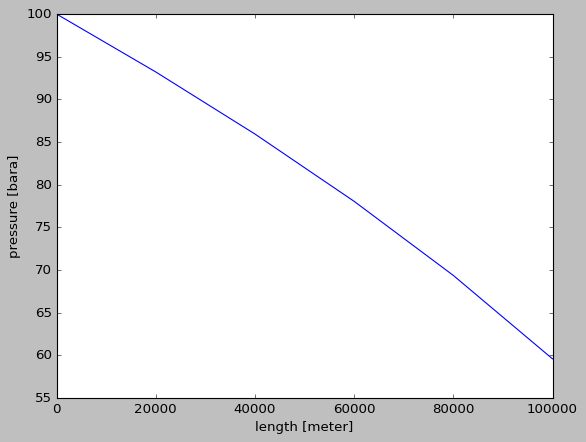

In [4]:
import matplotlib.pyplot as plt
plt.plot(pipe.getLengthProfile(), pipe.getPressureProfile())
plt.xlabel('length [meter]')
plt.ylabel('pressure [bara]')

Text(0, 0.5, 'velocity [m/sec]')

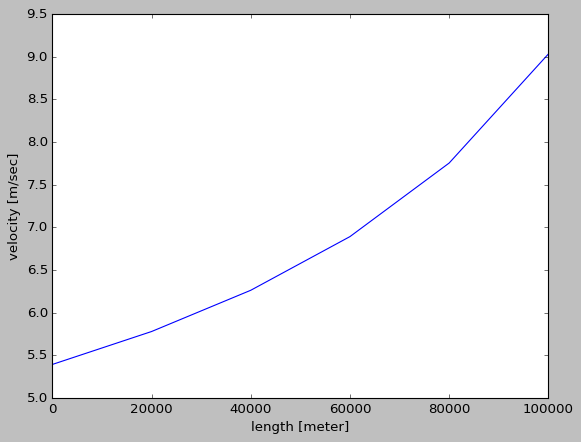

In [5]:
plt.plot(pipe.getLengthProfile(), pipe.getMixtureSuperficialVelocityProfile())
plt.xlabel('length [meter]')
plt.ylabel('velocity [m/sec]')

#Calculation of inlet pressure based on outlet pressure and flow
In the following example fwe will use the Beggs and Brill method for a multi phase pipeline.

In [6]:
from neqsim import methods
from neqsim.thermo import fluid, TPflash, createfluid2
from neqsim.process import pipe, pipeline, clearProcess, stream, runProcess
from neqsim import jNeqSim
from scipy.optimize import least_squares

#Creating inlet fluid using SRK-EoS
names = ['water', 'CO2', 'nitrogen', 'methane', 'ethane', 'n-heptane']
molefractions = [0.1, 0.01, 0.01, 0.77, 0.01, 0.1]
fluid1 = createfluid2(names, molefractions)
fluid1.setMixingRule('classic')
fluid1.setMultiPhaseCheck(True)

##Defining the pipeline
diameter2 = 32*0.0254

#Establish the process
stream1 = jNeqSim.processSimulation.processEquipment.stream.Stream(fluid1)
stream1.setFlowRate(10.0, "MSm3/day")
stream1.setTemperature(5.0, "C")
stream1.setPressure(50.0, "bara")

pipe = jNeqSim.processSimulation.processEquipment.pipeline.PipeBeggsAndBrills(stream1);
pipe.setDiameter(diameter2);
pipe.setPipeWallRoughness(5e-6);
pipe.setLength(150000);
pipe.setElevation(300.0);
pipe.setNumberOfIncrements(10);

def calcinpres(inletpressure):
  stream1.setFlowRate(flow, "MSm3/day")
  stream1.setPressure(inletpressure, "bara")
  stream1.run()
  pipe.run()
  return pipe.getOutletPressure()-outletpressure


#set flow and outlet pressure to calculate inlet pressure
for flows in [0.5, 1, 2, 3, 4]:
  for outletpres in[5, 10,15]:
    outletpressure = outletpres
    flow = flows
    inletpres = least_squares(calcinpres, outletpressure+50.0, bounds = ((0.0,  np.inf)),verbose=0);
    print('inlet pressure ' ,inletpres.x, ' otlet pressure ', outletpres,  'flow ', flow, ' flow regime ', pipe.getFlowRegime())

inlet pressure  [7.32012621]  otlet pressure  5 flow  0.5  flow regime  SEGREGATED
inlet pressure  [13.35940861]  otlet pressure  10 flow  0.5  flow regime  SEGREGATED
inlet pressure  [19.3130554]  otlet pressure  15 flow  0.5  flow regime  SEGREGATED
inlet pressure  [7.7735356]  otlet pressure  5 flow  1  flow regime  SEGREGATED
inlet pressure  [13.37532272]  otlet pressure  10 flow  1  flow regime  SEGREGATED
inlet pressure  [19.10138525]  otlet pressure  15 flow  1  flow regime  SEGREGATED
inlet pressure  [9.40781551]  otlet pressure  5 flow  2  flow regime  SEGREGATED
inlet pressure  [14.35398889]  otlet pressure  10 flow  2  flow regime  SEGREGATED
inlet pressure  [19.62667766]  otlet pressure  15 flow  2  flow regime  SEGREGATED
inlet pressure  [12.09908531]  otlet pressure  5 flow  3  flow regime  SEGREGATED
inlet pressure  [15.60378509]  otlet pressure  10 flow  3  flow regime  SEGREGATED
inlet pressure  [20.75264843]  otlet pressure  15 flow  3  flow regime  SEGREGATED
inlet p

In [7]:
#Establish the process
fluid1.setMultiPhaseCheck(True)
stream1 = jNeqSim.processSimulation.processEquipment.stream.Stream(fluid1)
stream1.setFlowRate(4.0, "MSm3/day")
stream1.setTemperature(5.0, "C")
stream1.setPressure(22.24586, "bara")
stream1.run()

pipe = jNeqSim.processSimulation.processEquipment.pipeline.PipeBeggsAndBrills(stream1);
pipe.setDiameter(diameter2);
pipe.setPipeWallRoughness(5e-6);
pipe.setLength(150000);
pipe.setElevation(300.0);
pipe.setNumberOfIncrements(20);
stream1.run()
pipe.run()


print('outlet pressure ', pipe.getOutletPressure(), ' flow regime ', pipe.getFlowRegime())

outlet pressure  15.412126440849294  flow regime  SEGREGATED


#Estimating inlet pressure based on flow and outlet pressure
In the following example we will use the above method to calculate to inlet pressure based on a known outlet pressure and flow rate.

In [9]:
#Creating inlet fluid using SRK-EoS
names = ['methane', 'nC12', 'water']
molefractions =  [0.90, 0.021, 0.1]
fluid1 = createfluid2(names, molefractions)
fluid1.setMixingRule('classic')
fluid1.setMultiPhaseCheck(True)
TPflash(fluid1,pressure=1.01325, temperature=278.15)
fluid1.initProperties()
GOR = fluid1.getPhase('gas').getVolume('m3')/fluid1.getPhase('oil').getVolume('m3')
WC = fluid1.getPhase('aqueous').getVolume('m3')/(fluid1.getPhase('oil').getVolume('m3')+fluid1.getPhase('aqueous').getVolume('m3'))*100
print('GOR ', GOR, ' [-]')
print('water cut ', WC, ' %')

GOR  3450.799716408914  [-]
water cut  27.104378248549597  %


,flow,in_pressure,out_pressure,velocity,flowregime
0,1,30.446266,10.0,9.563495,"(S, i, n, g, l, e, , P, h, a, s, e)"
1,1,30.804412,20.0,9.290606,"(S, i, n, g, l, e, , P, h, a, s, e)"
2,1,55.075627,50.0,3.520464,"(S, i, n, g, l, e, , P, h, a, s, e)"
3,1,102.453969,100.0,1.631724,"(S, i, n, g, l, e, , P, h, a, s, e)"
4,1,201.254255,200.0,0.825824,"(S, i, n, g, l, e, , P, h, a, s, e)"
5,2,45.800536,10.0,36.604733,"(S, i, n, g, l, e, , P, h, a, s, e)"
6,2,49.339674,20.0,18.046948,"(S, i, n, g, l, e, , P, h, a, s, e)"
7,2,67.199376,50.0,6.889012,"(S, i, n, g, l, e, , P, h, a, s, e)"
8,2,109.152339,100.0,3.266151,"(S, i, n, g, l, e, , P, h, a, s, e)"
9,2,204.831842,200.0,1.647791,"(S, i, n, g, l, e, , P, h, a, s, e)"


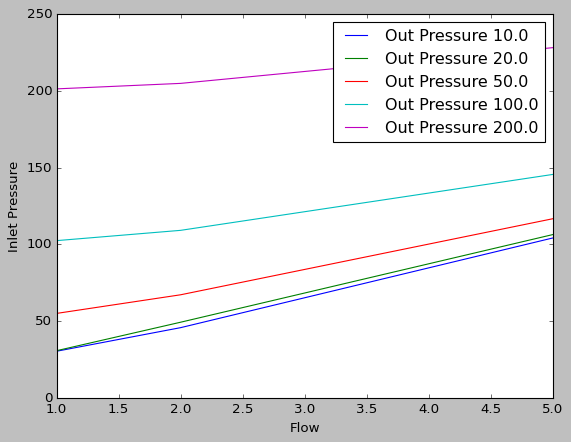

In [11]:
from neqsim.thermo import fluid, TPflash, createfluid2
from neqsim.process import pipe, pipeline, clearProcess, stream, runProcess
import numpy as np
import pandas as pd
from scipy.optimize import least_squares
import random
pipe_wall_roughness = 15e-6 #meter
pipeline_length = 30 #km
pipeline_diameter = 10 #inches
elevation = 0.0 #meter

feed_stream = jNeqSim.processSimulation.processEquipment.stream.Stream(fluid1)
feed_stream.setTemperature(5.0, 'C')
feed_stream.setPressure(100.0, 'bara')
pipeline = jNeqSim.processSimulation.processEquipment.pipeline.PipeBeggsAndBrills(feed_stream)
pipeline.setPipeWallRoughness(pipe_wall_roughness)
pipeline.setLength(pipeline_length*1e3)
pipeline.setElevation(elevation)
pipeline.setDiameter(pipeline_diameter*0.0254)
pipeline.setNumberOfIncrements(10)

def calcinpres(inletpressure, flow, outletpressure):
  feed_stream.setFlowRate(flow, "MSm3/day")
  feed_stream.setPressure(inletpressure, "bara")
  feed_stream.run()
  try:
    pipeline.run()
  except:
    print('failed')
    return 10.0+random.random()
  return pipeline.getOutletStream().getPressure("bara") - outletpressure

data = {'flow': [],  'in_pressure':[], 'out_pressure': [], 'velocity':[], 'flowregime':[] }

#set flow and outlet pressure to calculate inlet pressure
for flows in [1, 2, 5]:
  for outletpres in[10, 20, 50, 100.0, 200.0]:
    data['flow'].append(flows);
    data['out_pressure'].append(outletpres);
    inletpres = least_squares(calcinpres, outletpres+flows*30, args=(flows, outletpres), bounds=(5.0, 500.0));
    if(inletpres.success != True):
      print('failed to solve....')
    data['in_pressure'].append(inletpres.x[0]);
    data['flowregime'].append(pipeline.getFlowRegime())
    data['velocity'].append(pipeline.getOutletSuperficialVelocity());
    #print('inlet pressure ' ,inletpres.x[0] , ' otlet pressure ', outletpres,  'flow ', flows);


df = pd.DataFrame(data)
filename = 'data-pipeline-'+ str(pipeline_length) + 'km-' + str(pipeline_diameter) + 'in_id-GOR' + str(int(GOR))+ '-WC-' + str(int(WC))+ '.csv'
df.to_csv(filename)

from IPython.display import display
display(df)

grouped = df.groupby('out_pressure')

# Create line plots for each group
fig, ax = plt.subplots()
for name, group in grouped:
    ax.plot(group['flow'],group['in_pressure'], label='Out Pressure {}'.format(name))
ax.set_ylabel('Inlet Pressure')
ax.set_xlabel('Flow')
ax.legend()
plt.show()

In [ ]:
outletstream = pipeline.getOutletStream()
printFrame(outletstream.getFluid())